In [1]:
import pandas as pd
from collections import Counter
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.metrics.cluster import contingency_matrix

In [111]:
st_path = '/goofys/Samples/10X/human_heart/visium-OCT_LV_lognormalised.h5ad'
st_path = '/goofys/Samples/10X/human_heart/visium-OCT_RV_lognormalised.h5ad'
st_path = '/goofys/Samples/10X/human_heart/visium-OCT_LA_lognormalised.h5ad'
st_path = '/goofys/Samples/10X/human_heart/visium-OCT_RA_lognormalised.h5ad'
st_path = '../visium-OCT_RA_lognormalised_ssi_KLD.h5ad'
st_path = '../visium-OCT_SAN_lognormalised_ssi_KLD.h5ad'  # 77 Neurons, 253 nerve
st_path = '../visium-FFPE_SAN_lognormalised_ssi_KLD.h5ad'
st_path = '/goofys/Samples/10X/human_myocardial_infarction/Visium_control_P7.h5ad'
st_path = '../Visium_control_P7_ssi_KLD_heartcellatlas.h5ad'
st_path = '../Visium_control_P7_ssi_KLD.h5ad'

adata_st = sc.read_h5ad(st_path)
adata_st

AnnData object with n_obs × n_vars = 2931 × 14492
    obs: 'n_counts', 'n_genes', 'percent.mt', 'Adipocyte', 'Cardiomyocyte', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'Cycling.cells', 'vSMCs', 'cell_type_original', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'ssi', 'confidence'
    var: 'features'
    uns: 'X_approximate_distribution', 'X_normalization', 'default_embedding', 'schema_version', 'title'
    obsm: 'X_pca', 'X_spatial', 'X_umap'

In [80]:
# sc_path = '/goofys/Samples/sc_reference/heartcellatlas/Global_norm_markers.h5ad'
# adata_sc = sc.read_h5ad(sc_path)
# adata_sc

In [81]:

# sc.pl.spatial(adata_st, color='cell_type_original', library_id=None, spot_size=0.015)  # ['HCAHeartST8795933', 'HCAHeartST9383352', 'HCAHeartST9383354', 'HCAHeartST9383356', 'HCAHeartST9383358']
# plt.savefig(out_name, dpi=300, bbox_inches='tight')

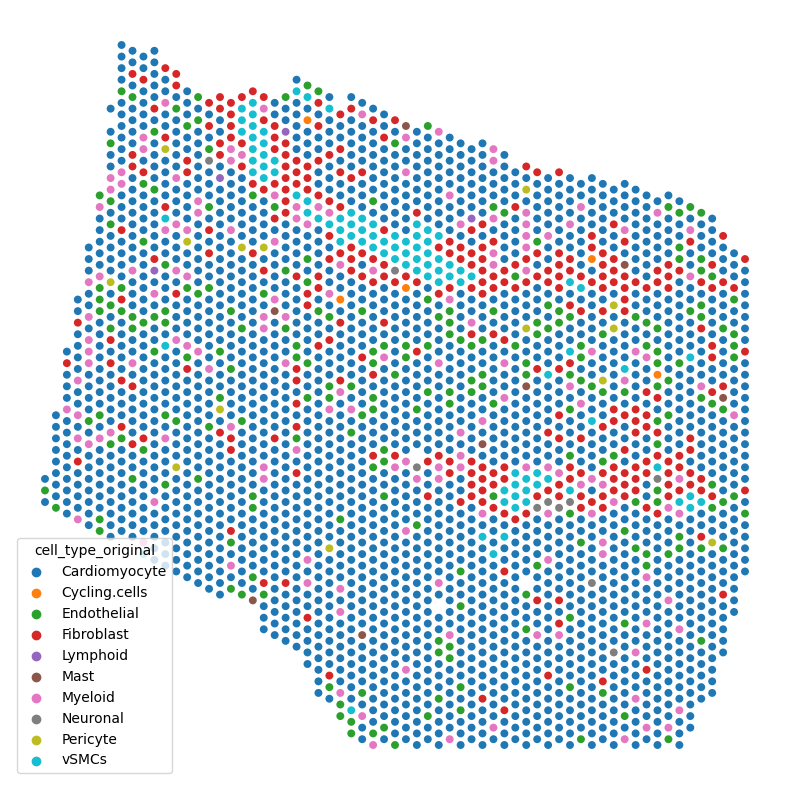

In [82]:
out_name = st_path.split('/')[-1].replace('.h5ad', '_all.png')
adata_st.obsm['spatial'] = adata_st.obsm['X_spatial']
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plot_spatial(
    adata_st,
    annotation=f"cell_type_original",
    spot_size=260,
    ax=axs
)
plt.savefig(out_name, dpi=300, bbox_inches='tight')

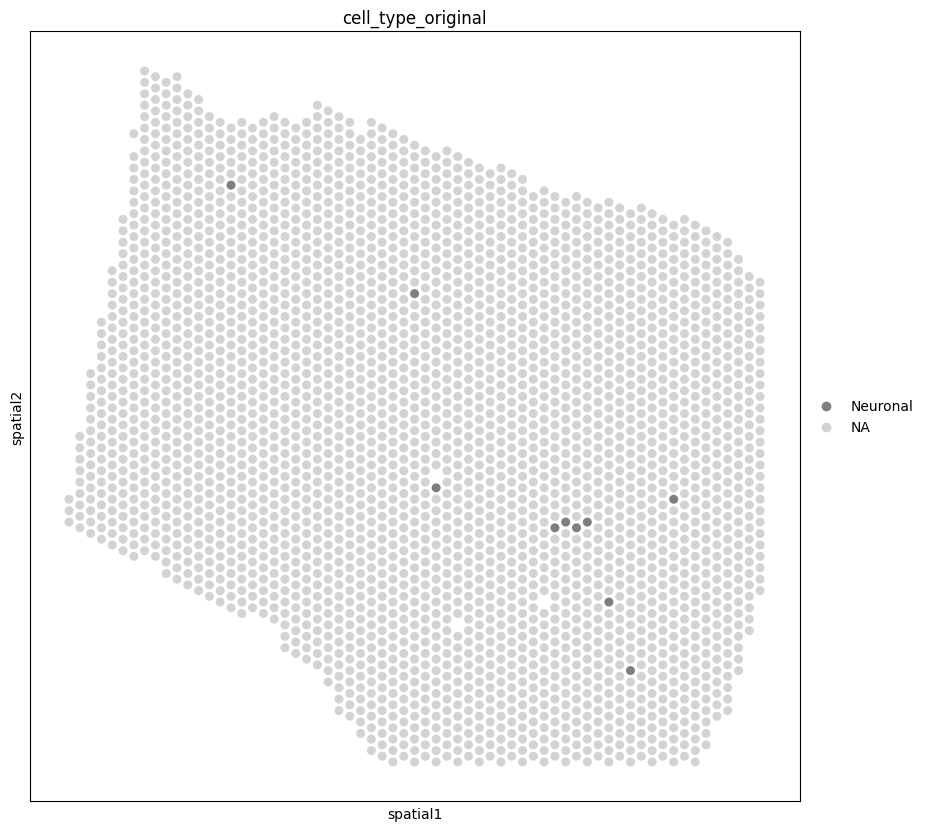

In [83]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
out_name = st_path.split('/')[-1].replace('.h5ad', '_original_neurons.png')
sc.pl.spatial(adata_st, color='cell_type_original', library_id=None, spot_size=0.013, groups=['Neuronal'], ax=axs, save=out_name)  # ['HCAHeartST8795933', 'HCAHeartST9383352', 'HCAHeartST9383354', 'HCAHeartST9383356', 'HCAHeartST9383358']


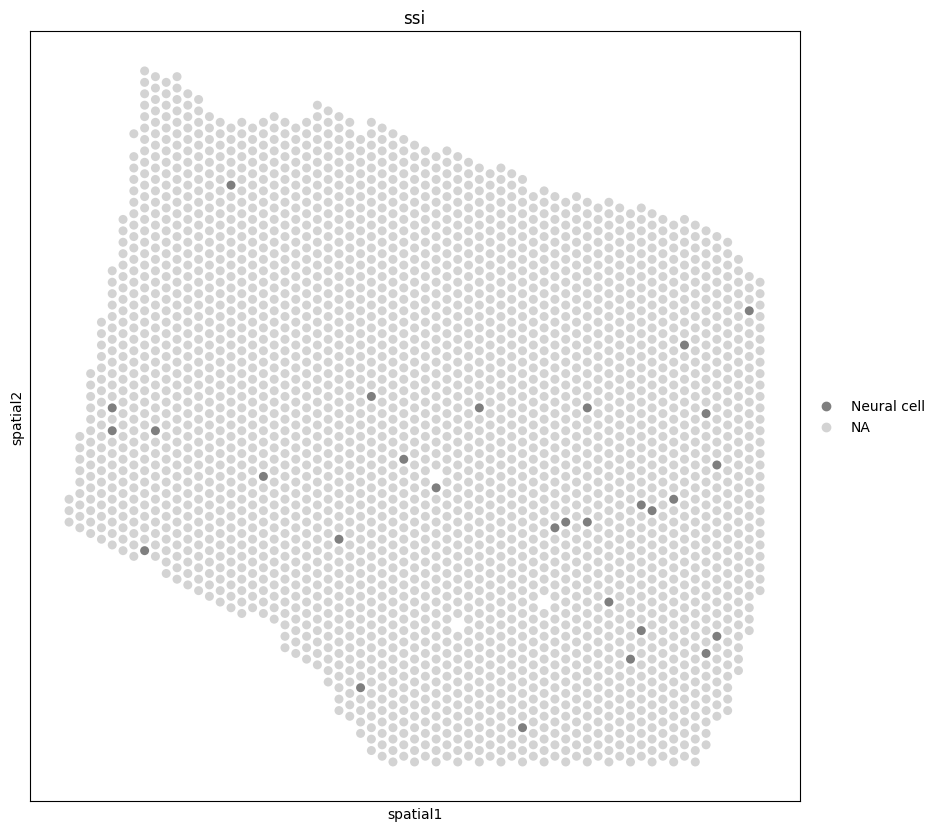

In [84]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
out_name = st_path.split('/')[-1].replace('.h5ad', '_codi_neurons.png')
sc.pl.spatial(adata_st, color='ssi', library_id=None, spot_size=0.013, groups=['Neural cell'], ax=axs, save=out_name)  # ['HCAHeartST8795933', 'HCAHeartST9383352', 'HCAHeartST9383354', 'HCAHeartST9383356', 'HCAHeartST9383358']

In [85]:
len(adata_st)

2931

In [86]:
Counter(adata_st.obs['ssi'])

Counter({'Mesothelial cell': 2154,
         'Endothelial cell': 594,
         'Myeloid': 81,
         'Fibroblast': 43,
         'Neural cell': 29,
         'Mural cell': 16,
         'Ventricular Cardiomyocyte': 8,
         'Atrial Cardiomyocyte': 5,
         'Lymphatic Endothelial cell': 1})

In [87]:
Counter(adata_st.obs['cell_type_original'])

Counter({'Cardiomyocyte': 2099,
         'Fibroblast': 310,
         'Endothelial': 230,
         'Myeloid': 155,
         'vSMCs': 96,
         'Pericyte': 14,
         'Neuronal': 10,
         'Mast': 8,
         'Cycling.cells': 5,
         'Lymphoid': 4})

In [88]:
# Counter(adata_sc.obs['cell_type'])

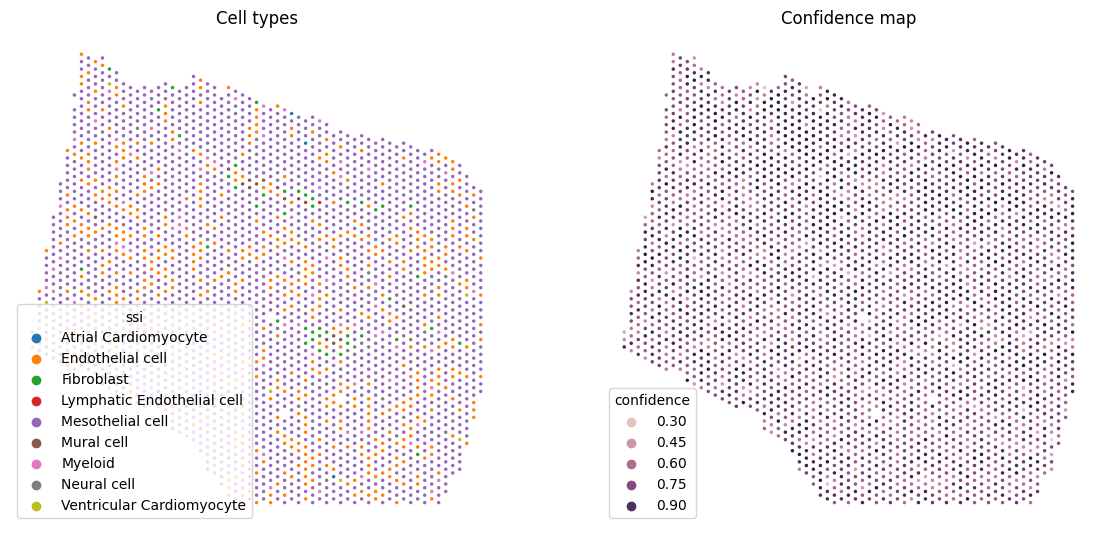

In [89]:
out_name = st_path.split('/')[-1].replace('.h5ad', '_codi_conf.png')
if "spatial" in adata_st.obsm_keys():
    fig, axs = plt.subplots(1, 2, figsize=(14, 14))
    plot_spatial(
        adata_st,
        annotation=f"ssi",
        spot_size=50,
        ax=axs[0],
        title="Cell types"
    )
    plot_spatial(
        adata_st,
        annotation=f"confidence",
        spot_size=50,
        ax=axs[1],
        title="Confidence map"
    )
    plt.savefig(out_name, dpi=120, bbox_inches="tight")

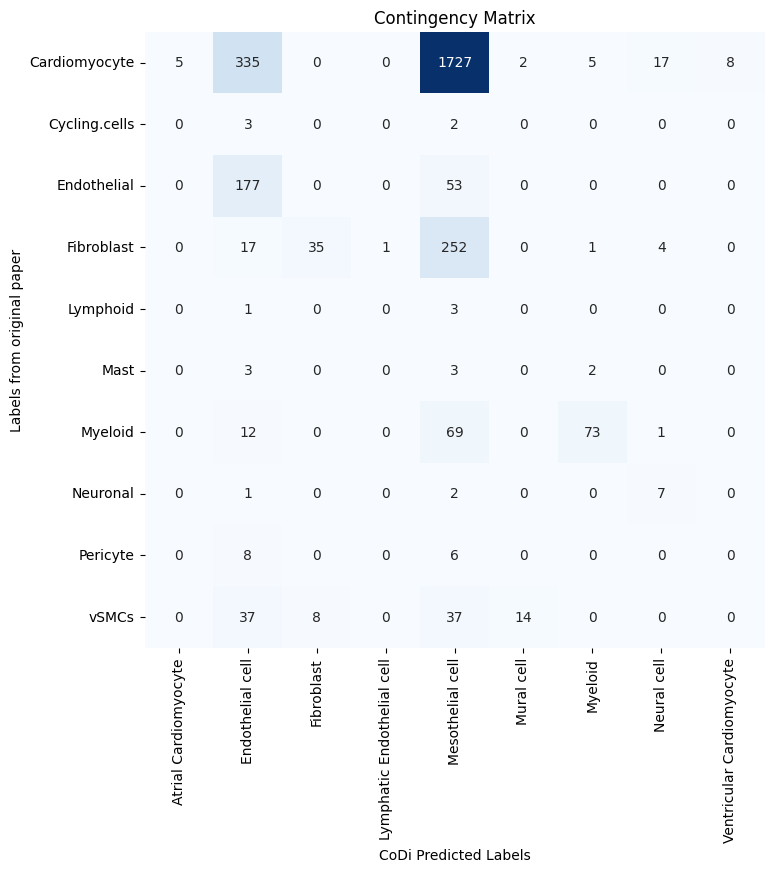

In [90]:
out_name = st_path.split('/')[-1].replace('.h5ad', '_codi_contingency.png')
cm = contingency_matrix(adata_st.obs.loc[:, 'cell_type_original'], adata_st.obs.loc[:, 'ssi'])
# Visualize the confusion matrix using Seaborn
class_labels_y = np.unique(adata_st.obs.loc[:, 'cell_type_original'])
class_labels_x = np.unique(adata_st.obs.loc[:, 'ssi'])

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels_x, yticklabels=class_labels_y)
plt.xlabel("CoDi Predicted Labels")
plt.ylabel("Labels from original paper")
plt.title("Contingency Matrix")
plt.savefig(out_name, dpi=300, bbox_inches='tight')

Text(0.5, 1.0, 'Contingency Matrix')

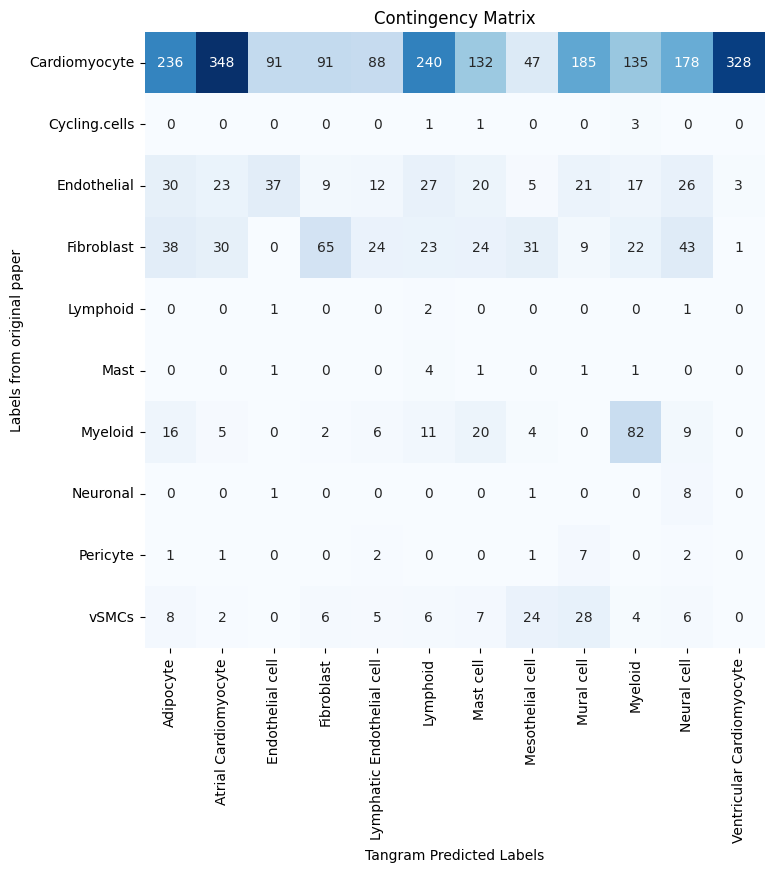

In [130]:
# tangram = pd.read_csv('/goofys/users/MarijaBezulj/Visium_control_P7_tangram.csv')
tangram = pd.read_csv('/goofys/users/MarijaBezulj/Visium_control_P7_tangramrna.csv')



cm = contingency_matrix(adata_st.obs.loc[:, 'cell_type_original'], tangram['tangram'])
# Visualize the confusion matrix using Seaborn
class_labels_y = np.unique(adata_st.obs.loc[:, 'cell_type_original'])
class_labels_x = np.unique(tangram['tangram'])

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels_x, yticklabels=class_labels_y)
plt.xlabel("Tangram Predicted Labels")
plt.ylabel("Labels from original paper")
plt.title("Contingency Matrix")

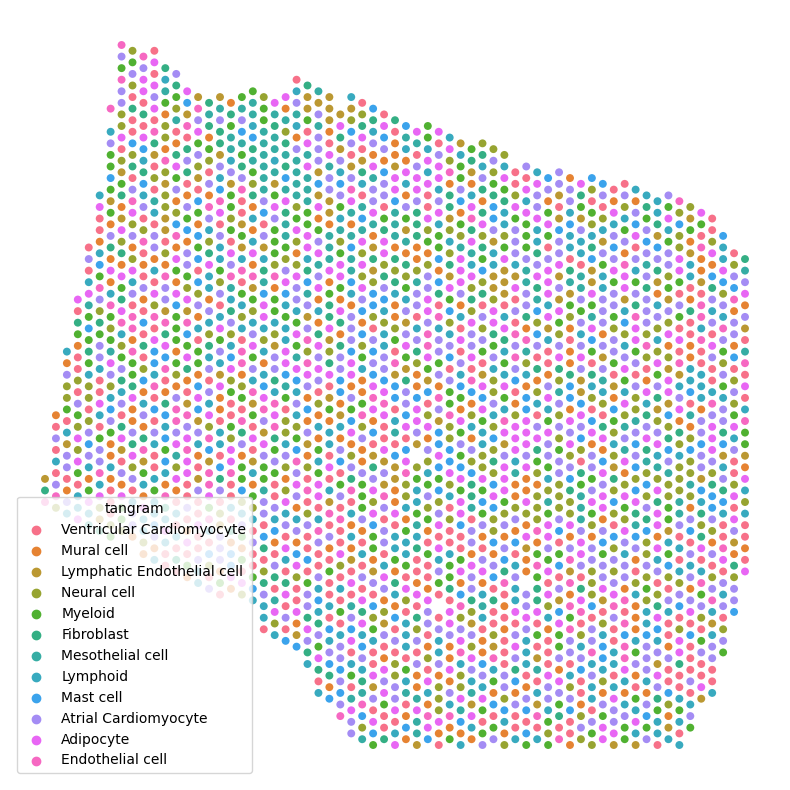

In [121]:
adata_st.obs.loc[:, 'tangram'] = tangram['tangram'].values
adata_st.obsm['spatial'] = adata_st.obsm['X_spatial']
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
plot_spatial(
    adata_st,
    annotation=f"tangram",
    spot_size=260,
    ax=axs
)

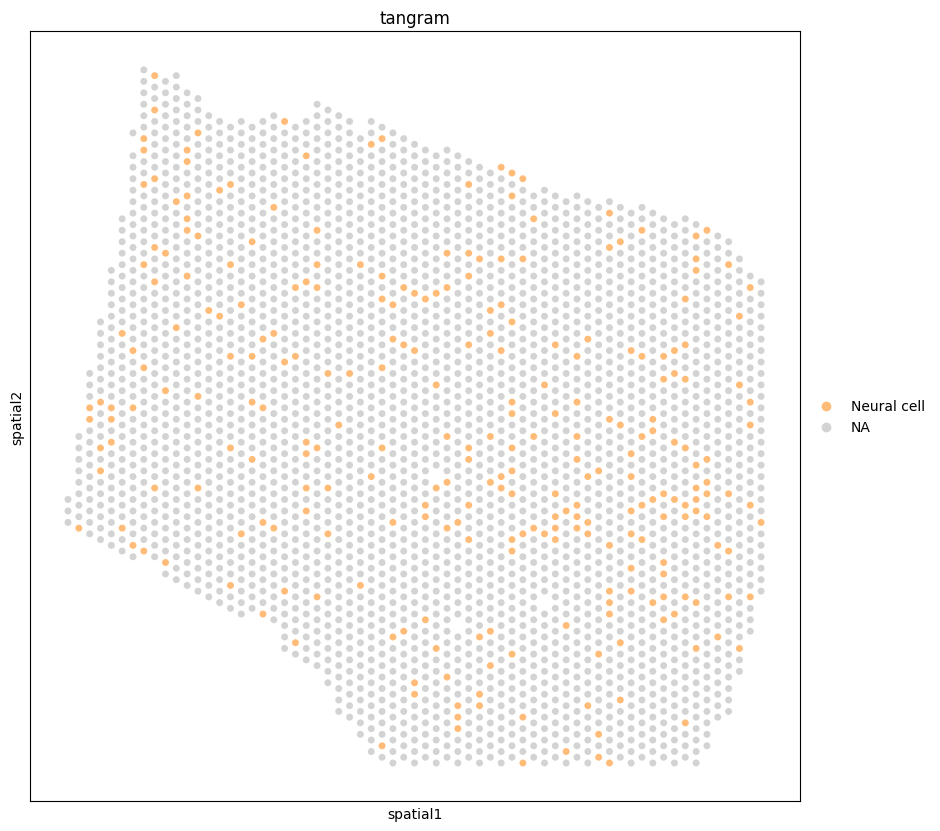

In [129]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))
sc.pl.spatial(adata_st, color='tangram', library_id=None, spot_size=0.01, groups=['Neural cell'], ax=axs)
plt.show()# ['HCAHeartST8795933', 'HCAHeartST9383352', 'HCAHeartST9383354', 'HCAHeartST9383356', 'HCAHeartST9383358']

In [91]:
# adata_st = sc.read_h5ad('../GSE121893_heart_4933_cells_ssi.h5ad')
# adata_st

In [92]:
# cell_type_mapping = {
#     'AV': 'Pericytes',
#     'EC1': 'Endothelium',
#     'EC2': 'Endothelium',
#     'EC3': 'Endothelium',
#     'EC4': 'Endothelium',
#     'EC5': 'Endothelium',
#     'EC6': 'Endothelium',
#     'EC7': 'Endothelium',
#     'FB1': 'Fibroblasts',
#     'FB2': 'Fibroblasts',
#     'FB3': 'Fibroblasts',
#     'FB4': 'Fibroblasts',
#     'FB5': 'Fibroblasts',
#     'FB6': 'Fibroblasts',
#     'LA1': 'Unknown',
#     'LA2': 'Unknown',
#     'LA3': 'Unknown',
#     'LA4': 'Unknown',
#     'LA5': 'Unknown',
#     'LA6': 'Unknown',
#     'LV1': 'Unknown',
#     'LV2': 'Unknown',
#     'LV3': 'Unknown',
#     'LV4': 'Unknown',
#     'LV5': 'Unknown',
#     'LV6': 'Unknown',
#     'LV7': 'Unknown',
#     'MP1': 'Macrophages',
#     'MP2': 'Macrophages',
#     'MP3': 'Macrophages',
#     'MP4': 'Macrophages',
#     'SMC1': 'Smooth_Muscle',
#     'SMC2': 'Smooth_Muscle',
#     'SMC3': 'Smooth_Muscle',
#     'SMC4': 'Smooth_Muscle',
#     'SMC5': 'Smooth_Muscle'
# }
# adata_st.obs.loc[:, 'cell_type_mapped'] = [cell_type_mapping[x] for x in adata_st.obs['cell_type']]

In [93]:
# cm = contingency_matrix(adata_st.obs.loc[:, 'annotation_final'], adata_st.obs.loc[:, 'ssi'])
# # Visualize the confusion matrix using Seaborn
# class_labels_y = np.unique(adata_st.obs.loc[:, 'annotation_final'])
# class_labels_x = np.unique(adata_st.obs.loc[:, 'ssi'])

# plt.figure(figsize=(8,8))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels_x, yticklabels=class_labels_y)
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.title("Contingency Matrix")
# plt.show()

In [94]:
# Calculate marker genes
# sc.pp.normalize_total(adata_st, target_sum=1e4)
# sc.pp.log1p(adata_st)
# adata_st.var_names_make_unique()
# adata_st = adata_st[adata_st.obs['ssi'] != 'Mural cell'].copy()
adata_st = adata_st[adata_st.obs['ssi'] != 'Lymphatic Endothelial cell'].copy()

sc.tl.rank_genes_groups(adata_st, groupby='ssi', use_raw=False)

In [95]:
markers_df = pd.DataFrame(adata_st.uns["rank_genes_groups"]["names"])
pval_df = pd.DataFrame(adata_st.uns["rank_genes_groups"]["pvals_adj"])
markers_per_type_dict = {}
for col in markers_df.columns:
    markers_per_type_dict[col] = markers_df.loc[pval_df[col] < 0.05, col].values
len(markers_per_type_dict['Neural cell'])

4653

In [96]:
markers_per_type_dict.keys()

dict_keys(['Atrial Cardiomyocyte', 'Endothelial cell', 'Fibroblast', 'Mesothelial cell', 'Mural cell', 'Myeloid', 'Neural cell', 'Ventricular Cardiomyocyte'])

In [97]:
adata_st.var

,features
AL627309.5,AL627309.5
LINC01409,LINC01409
LINC01128,LINC01128
FAM41C,FAM41C
SAMD11,SAMD11
...,...
AC011043.1,AC011043.1
AL592183.1,AL592183.1
AC004556.3,AC004556.3
AC136616.1,AC136616.1


In [98]:

# Tyrosine Hydroxylase (TH):
# Explanation: TH is commonly associated with the synthesis of catecholamines, including norepinephrine. Neurons expressing TH are often related to the sympathetic nervous system, which influences cardiac function.
# Reference: Goldstein, D. S., & Eisenhofer, G. (2011). A clinical perspective: Autonomic failure as the key initial feature of Parkinson's disease. Neurology, 77(6), 552-558.


# Choline Acetyltransferase (CHAT):
# Explanation: CHAT is involved in acetylcholine synthesis, a neurotransmitter found in parasympathetic neurons that regulate heart rate.
# Reference: Gibbons, D. D., & Kreider, M. S. (1987). The synthesis and localization of acetylcholine in the heart. Journal of Neuroscience Research, 18(2), 157-167.

# Vasoactive Intestinal Peptide (VIP):
# Explanation: VIP is a neurotransmitter found in some intrinsic cardiac neurons, playing a role in neurotransmission.
# Reference: Suleiman, S. A., et al. (2003). Cardiac neuronal hierarchy in health and disease. American Journal of Physiology-Heart and Circulatory Physiology, 285(5), H1774-H1781.

# Nitric Oxide Synthase 1 (NOS1):
# Explanation: NOS1 is involved in nitric oxide production, and its expression in neurons suggests a role in cardiac regulation.
# Reference: Kanai, A. J., et al. (2001). Neuronal nitric oxide synthase modulates basal and β-adrenergic-stimulated contractility in murine ventricular myocytes. Circulation, 104(25), 2962-2967.

# Calretinin:
# Explanation: Calretinin is a calcium-binding protein found in some cardiac neurons, indicating a neuronal population.
# Reference: Sabrià, J., et al. (2005). Calretinin, parvalbumin, and calbindin-D28k in human heart. An immunohistochemical study. Annals of Anatomy - Anatomischer Anzeiger, 187(4), 321-328.

# HuC/HuD (Neuronal RNA-binding proteins):
# Explanation: HuC/HuD are neuronal RNA-binding proteins expressed in various neuronal populations.
# Reference: Marusich, M. F., et al. (1994). Cloning and characterization of HuR, a ubiquitously expressed Elav-like protein. Journal of Biological Chemistry, 269(26), 20796-20802.

# Neurofilament Proteins (NEFL, NEFM, NEFH):
# Explanation: Neurofilament proteins are structural components of neurons, providing support to the cell.
# Reference: Lee, M. K., & Cleveland, D. W. (1996). Neuronal intermediate filaments. Annual Review of Neuroscience, 19, 187-217.


neuron_heart_marker_genes = [
    "TH",           # Tyrosine Hydroxylase
    "CHAT",         # Choline Acetyltransferase
    "VIP",          # Vasoactive Intestinal Peptide
    "NOS1",         # Nitric Oxide Synthase 1
    "Calretinin",   # Calretinin  NOT present
    "HuC/HuD",      # Neuronal RNA-binding proteins  NOT present
    "NEFL",         # Neurofilament Light (NEFL)
    "NEFM",         # Neurofilament Medium (NEFM)
    "NEFH"          # Neurofilament Heavy (NEFH)
]
for gene in neuron_heart_marker_genes:
    out = ''
    if gene not in adata_st.var.index:
        out = (f'Gene {gene} does not exist')
    else:
        if gene not in markers_per_type_dict['Neural cell']:
            out = f'{gene} NOT MARKER '
        else:
            out += '{}: p-val = {}'.format(gene, pval_df.loc[ markers_df[markers_df['Neural cell'] == gene].index, 'Neural cell' ].values[0])
    print(out)


Gene TH does not exist
Gene CHAT does not exist
VIP: p-val = 0.004343787017836105
Gene NOS1 does not exist
Gene Calretinin does not exist
Gene HuC/HuD does not exist
Gene NEFL does not exist
Gene NEFM does not exist
Gene NEFH does not exist


In [59]:
for gene in (adata_st.var.index):
    if 'nef' in gene.lower():
        print(gene)

In [16]:
adata_st.obs[adata_st.obs['sc_type'] == 'Neurons']

,nGene,nUMI,condition,group,sample,cell_type,Age,sc_type,confidence,cell_type_mapped
cell_id,,,,,,,,,,
SC_96355_70_32,2578,12948,dHF_LV,NCM,D2,SMC1,51,Neurons,0.65,Smooth_Muscle
SC_96355_30_16,4785,131641,dHF_LV,NCM,D2,MP4,51,Neurons,0.45,Macrophages
SC_96407_54_70,1029,4926,dHF_LA,NCM,D2,FB2,51,Neurons,0.35,Fibroblasts
SC_96407_27_68,1207,4129,dHF_LA,NCM,D2,EC6,51,Neurons,0.65,Endothelium


<Axes: xlabel='confidence', ylabel='Count'>

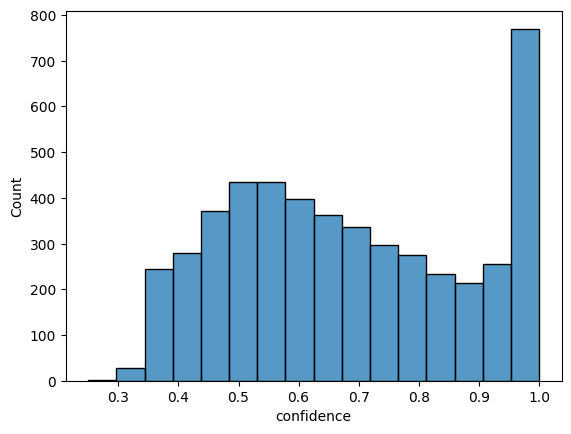

In [17]:
sns.histplot(adata_st.obs['confidence'])

In [7]:
from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import seaborn as sns
# Visualisation
def plot_spatial(
    adata, annotation, ax: Axes, spot_size: float, palette=None, title: str = ""
):
    """
    Scatter plot in spatial coordinates.

    Parameters:
        - adata (AnnData): Annotated data object which represents the sample
        - annotation (str): adata.obs column used for grouping
        - ax (Axes): Axes object used for plotting
        - spot_size (int): Size of the dot that represents a cell. We are passing it as a diameter of the spot, while
                the plotting library uses radius therefore it is multiplied by 0.5
        - palette (dict): Dictionary that represents a mapping between annotation categories and colors
        - title (str): Title of the figure

    """
    s = spot_size * 0.5
    data = adata
    ax = sns.scatterplot(
        data=data.obs,
        hue=annotation,
        x=data.obsm["spatial"][:, 0],
        y=data.obsm["spatial"][:, 1],
        ax=ax,
        s=s,
        linewidth=0,
        palette=palette,
        marker=".",
    )
    ax.invert_yaxis()
    ax.set(yticklabels=[], xticklabels=[], title=title)
    ax.tick_params(bottom=False, left=False)
    ax.set_aspect("equal")
    sns.despine(bottom=True, left=True, ax=ax)


# fig, axs = plt.subplots(1, 1, figsize=(14, 14))
# sns.histplot(adata_st.obs["sc_type"], ax=axs[0][0])
# plot_spatial(
#     adata_st,
#     annotation=f"sc_type",
#     spot_size=30,
#     ax=axs,
# )
# plot_spatial(
#     adata_st, annotation="in_tissue", spot_size=30, ax=axs[1]
# )
# plt.savefig(f"ssi_visium_brain.png", dpi=120, bbox_inches="tight")
